# Stroke Prediction Notebook

This notebook will explore the Stroke dataset


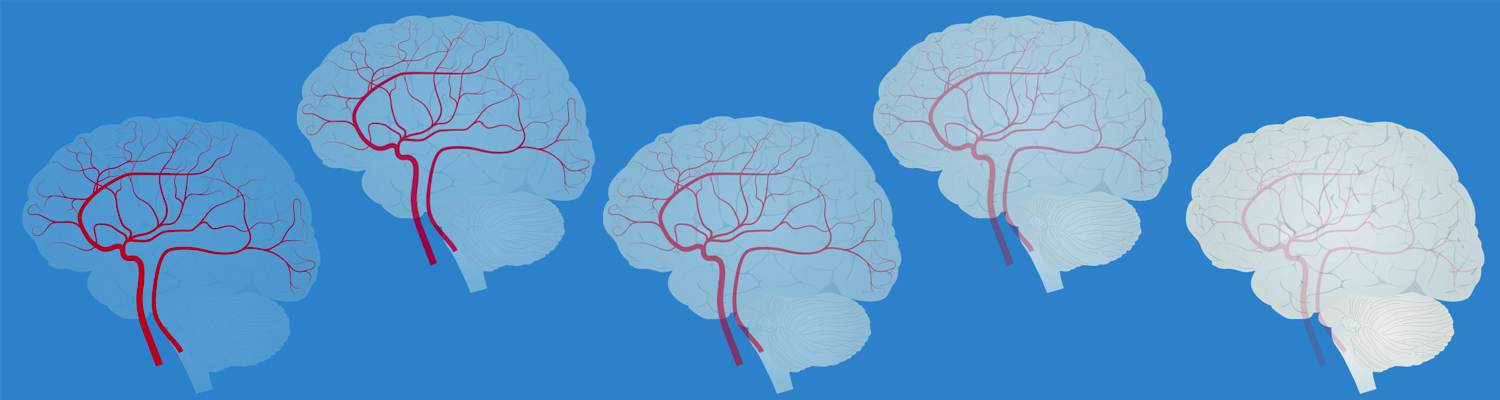

Importing the necessary libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploring the data

Importing the data from a .csv file


In [21]:
path = 'dataset/health_data.csv'
stroke_df = pd.read_csv(path)
display(stroke_df.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


To know more info about the dataset


In [22]:
display(stroke_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


None

In [23]:
display(stroke_df.describe())

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


(160, 12)

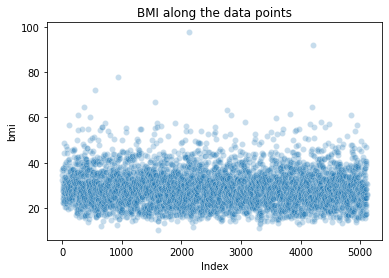

In [24]:
display(stroke_df[(stroke_df['bmi']>=45)].shape)
sns.scatterplot(x=stroke_df.index ,y='bmi', data=stroke_df, alpha=0.25)
plt.xlabel('Index')
plt.title('BMI along the data points')
plt.show()

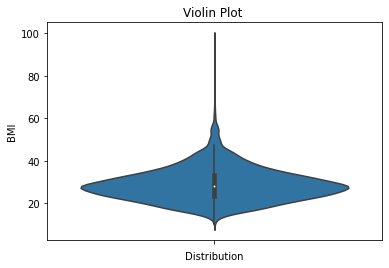

In [25]:
sns.violinplot(y=stroke_df['bmi'], alpha = 0.25)
plt.xlabel('Distribution')
plt.ylabel('BMI')
plt.title('Violin Plot ')
plt.show()

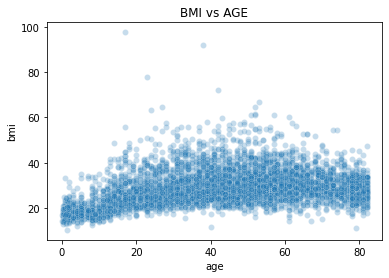

In [26]:
sns.scatterplot(x='age', y='bmi', data=stroke_df, alpha = 0.25)
plt.title('BMI vs AGE')
plt.show()

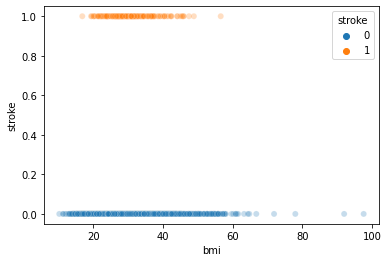

In [27]:
sns.scatterplot(x='bmi', y='stroke', data=stroke_df, hue='stroke', alpha=0.25)
plt.show()

Looking into the data, a normal BMI value oscillates between 18.5 and 45. The data set has the 75% of the BMI data below 33 but the other 25% is greater than 33 and also take values >90. This may represent, errors on the data collection and that is why for this analysis the BMI wont be taken into account. Let's look into the age data.

In [28]:
display(stroke_df.describe()['age'])
display(stroke_df[stroke_df['age']<=2].describe())

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,175.000000,175.00000,175.0,175.000000,175.000000,169.000000,175.000000
mean,38893.188571,1.40000,0.0,0.005714,95.463200,18.676923,0.005714
std,19987.221807,0.59954,0.0,0.075593,27.595876,3.115075,0.075593
min,760.000000,0.08000,0.0,0.000000,55.510000,10.300000,0.000000
25%,23118.500000,1.00000,0.0,0.000000,75.455000,16.900000,0.000000
50%,40951.000000,1.56000,0.0,0.000000,90.510000,18.500000,0.000000
75%,55161.000000,2.00000,0.0,0.000000,111.710000,20.300000,0.000000
max,72940.000000,2.00000,0.0,1.000000,199.830000,33.100000,1.000000


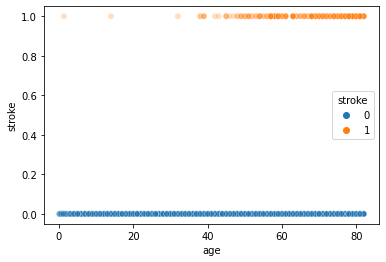

In [29]:
sns.scatterplot(x='age', y='stroke', data=stroke_df, hue='stroke', alpha=0.25)
plt.show()

In [30]:
# How many people had have a stroke with an age below 2?
display(stroke_df[(stroke_df['age']<=2) & (stroke_df['stroke']==1)])

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1


The age value is inconsistent, now we'll look for more inconsistencies related to ever_married and work_type

In [31]:
display(stroke_df[(stroke_df['age']<=2) & ((stroke_df['ever_married']!='No') | (stroke_df['work_type']!='children'))])

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


There are no more inconsistencies on the data so the age will be rounded to the proximal integer.

In [38]:
stroke_df['age'] = stroke_df['age'].apply(np.ceil)
display(stroke_df[stroke_df['age']<=2])
display(stroke_df['age'].describe())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,2.0,0,0,No,children,Urban,70.37,NaN,Unknown,1
363,7559,Female,1.0,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,22706,Female,1.0,0,0,No,children,Rural,88.11,15.5,Unknown,0
437,5010,Female,2.0,0,0,No,children,Rural,92.48,18.0,Unknown,0
562,45238,Female,2.0,0,0,No,children,Urban,58.26,16.5,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4961,3720,Female,2.0,0,0,No,children,Rural,80.30,21.2,Unknown,0
5032,67426,Female,2.0,0,0,No,children,Rural,61.94,20.3,Unknown,0
5079,42709,Male,2.0,0,0,No,children,Urban,77.28,17.1,Unknown,0
5089,56714,Female,1.0,0,0,No,children,Rural,62.13,16.8,Unknown,0


count    5110.000000
mean       43.237769
std        22.591958
min         1.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [56]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values='Other', strategy='most_frequent')
#imp.fit(stroke_df['gender'])
stroke_df['gender'] = imp.fit_transform(stroke_df['gender'].values.reshape(-1,1))
display(stroke_df['gender'].unique())

array(['Male', 'Female'], dtype=object)

We can see the object type in 4 columns of the dataset ['gender', 'ever_married', 'work_type', 'residence_type']

Let's start converting the categorical data to numerical data

In [57]:
print(stroke_df['gender'].unique())
print(stroke_df['ever_married'].unique())
print(stroke_df['work_type'].unique())
print(stroke_df['Residence_type'].unique())
print(stroke_df['smoking_status'].unique())

['Male' 'Female']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [58]:
display(stroke_df[stroke_df['gender']=='Other'])

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


### Looking for missing data

In [59]:
display(stroke_df.isna().sum().sort_values())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
bmi                  201
dtype: int64

In [60]:
display(stroke_df[stroke_df['bmi'].isna() & stroke_df['stroke']==1])

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,69160,Male,59.0,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,1845,Female,63.0,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,37937,Female,75.0,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,18587,Female,76.0,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,15102,Male,78.0,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


In [61]:
# for gender 0:female, 1:male
stroke_df['gender'] = stroke_df['gender'].astype('category').cat.codes
# for ever married 0:No, 1:yes
stroke_df['ever_married'] = stroke_df['ever_married'].astype('category').cat.codes
# for residence_type 0:Rural, 1:Urban
stroke_df['Residence_type'] = stroke_df['Residence_type'].astype('category').cat.codes
display(stroke_df.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [62]:
# for work_type 
work_type_dummies = pd.get_dummies(stroke_df['work_type'])
display(work_type_dummies.head())

# for smoking_status
smoking_status_dummies = pd.get_dummies(stroke_df['smoking_status'])
display(smoking_status_dummies.head())


,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0


,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
